In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Завантаження даних
(train_data, test_data), info = tfds.load('fashion_mnist', split=['train', 'test'], with_info=True)


train_data = train_data.map(lambda x: (x['image'], x['label']))
test_data = test_data.map(lambda x: (x['image'], x['label']))

print(info)

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir='C:\\Users\\Vandergraf\\tensorflow_datasets\\fashion_mnist\\3.0.1',
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747

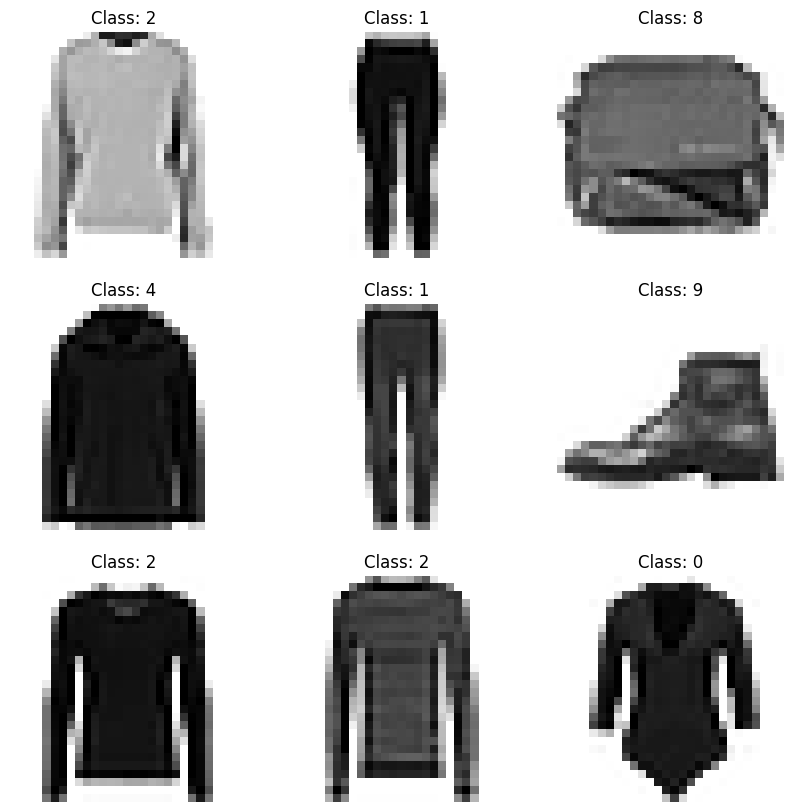

In [3]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(train_data.take(9)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(image.numpy().squeeze(), cmap=plt.cm.binary)
    plt.title(f'Class: {label}')
    plt.axis('off')
plt.show()

In [4]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
import numpy as np

model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),    
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.00001)), 
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),   
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),    
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),   
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),    
    layers.Dense(10, activation='softmax')    
])

# Встановлення параметрів ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Функція для динамічного налаштування розміру пакету
def batch_size_scheduler(epoch, batch_size):
    if epoch % 10 == 0 and epoch != 0:
        return batch_size * 2  # Подвоїти розмір пакету кожні 10 епох
    else:
        return batch_size

class DynamicBatchSizeCallback(tf.keras.callbacks.Callback):
    def __init__(self, initial_batch_size):
        super(DynamicBatchSizeCallback, self).__init__()
        self.batch_size = initial_batch_size

    def on_epoch_begin(self, epoch, logs=None):
        self.model.batch_size = self.batch_size

    def on_epoch_end(self, epoch, logs=None):
        self.batch_size = batch_size_scheduler(epoch + 1, self.batch_size)

initial_batch_size = 64  # Початковий розмір пакету

batch_size_callback = DynamicBatchSizeCallback(initial_batch_size)

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data.batch(initial_batch_size),
                    epochs=200,
                    validation_data=test_data.batch(64),
                    callbacks=[batch_size_callback, reduce_lr])


Epoch 1/200


C:\Users\Vandergraf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.7233 - loss: 3.0488 - val_accuracy: 0.8085 - val_loss: 0.6721 - learning_rate: 1.0000e-04
Epoch 2/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8391 - loss: 0.5311 - val_accuracy: 0.8302 - val_loss: 0.5317 - learning_rate: 1.0000e-04
Epoch 3/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8643 - loss: 0.4204 - val_accuracy: 0.8449 - val_loss: 0.4992 - learning_rate: 1.0000e-04
Epoch 4/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.8758 - loss: 0.3717 - val_accuracy: 0.8468 - val_loss: 0.5042 - learning_rate: 1.0000e-04
Epoch 5/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8872 - loss: 0.3386 - val_accuracy: 0.8603 - val_loss: 0.4418 - learning_rate: 1.0000e-04
Epoch 6/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.8946 - loss: 0.3131 - val_accuracy: 0.8638 - val_loss: 0.4297 - learning_rate: 1.0000e-04
Epoch 7/200
938/938 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - a